In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG19, MobileNet
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
def build_model(base_model):
    base_model.trainable = False  # Freeze the base model
    model = tf.keras.Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [5]:
with tf.device(device_name):
    # Initialize ResNet50, VGG19, and MobileNet
    input_shape = (32, 32, 3)

    resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

    # Build models with custom classification heads
    resnet_model = build_model(resnet50)
    vgg_model = build_model(vgg19)
    mobilenet_model = build_model(mobilenet)
    # Compile models
    models = [resnet_model, vgg_model, mobilenet_model]
    for model in models:
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<ipython-input-5-26526de808a6>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Set parameters
epochs = 10
batch_size = 64

# Train each model and store history
history_resnet = resnet_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
history_vgg = vgg_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
history_mobilenet = mobilenet_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.2018 - loss: 2.2019 - val_accuracy: 0.2801 - val_loss: 1.9702
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.3049 - loss: 1.9119 - val_accuracy: 0.3477 - val_loss: 1.8313
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3355 - loss: 1.8388 - val_accuracy: 0.2892 - val_loss: 1.9530
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3542 - loss: 1.7935 - val_accuracy: 0.3206 - val_loss: 1.8678
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3579 - loss: 1.7763 - val_accuracy: 0.3761 - val_loss: 1.7312
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3735 - loss: 1.7466 - val_accuracy: 0.3788 - val_loss: 1.7240
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3774 - loss: 1.7345 - val_accuracy: 0.3941 - val_loss: 1.6960
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3867 - loss: 1.7079 - val

In [7]:
# Evaluate each model on the test set
resnet_score = resnet_model.evaluate(x_test, y_test, verbose=0)
vgg_score = vgg_model.evaluate(x_test, y_test, verbose=0)
mobilenet_score = mobilenet_model.evaluate(x_test, y_test, verbose=0)

# Print the results
print(f"ResNet50 Test Loss: {resnet_score[0]}, Test Accuracy: {resnet_score[1]}")
print(f"VGG19 Test Loss: {vgg_score[0]}, Test Accuracy: {vgg_score[1]}")
print(f"MobileNet Test Loss: {mobilenet_score[0]}, Test Accuracy: {mobilenet_score[1]}")


ResNet50 Test Loss: 1.6890954971313477, Test Accuracy: 0.39890000224113464
VGG19 Test Loss: 1.1370949745178223, Test Accuracy: 0.6057999730110168
MobileNet Test Loss: 2.11344051361084, Test Accuracy: 0.23739999532699585


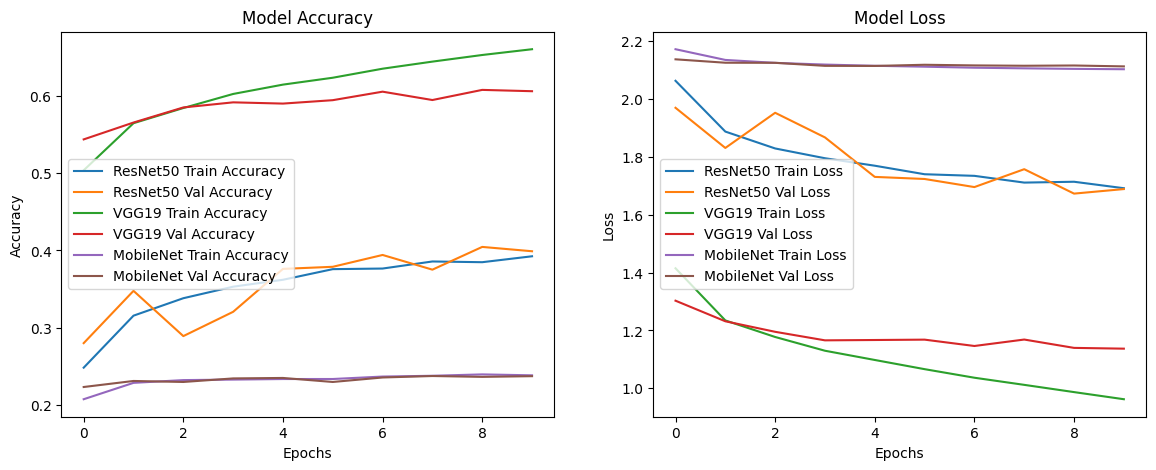

In [8]:
# Plot function
def plot_history(histories, model_names):
    plt.figure(figsize=(14, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot histories
plot_history([history_resnet, history_vgg, history_mobilenet], ['ResNet50', 'VGG19', 'MobileNet'])
